# Practical Costs

### Classes and modules

In [1]:
#Lets have matplotlib "inline"
%matplotlib inline

import os
import sys

#Import packages we need
import numpy as np
import datetime
from IPython.display import display
import copy

#For plotting
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["lines.color"] = "w"
plt.rcParams["text.color"] = "w"
plt.rcParams["axes.labelcolor"] = "w"
plt.rcParams["xtick.color"] = "w"
plt.rcParams["ytick.color"] = "w"

plt.rcParams["image.origin"] = "lower"

import pycuda.driver as cuda

In [2]:
source_path = "/home/florianb/havvarsel/multilevelDA/scripts/PracticalCost/Basin/2023-06-29T14_54_02"

In [3]:
def raw2costs(filename):
    rawCosts = np.load(source_path+"/"+filename)
    return np.mean(np.sort(rawCosts)[:,2:-2], axis=1)

In [4]:
def raw2costsEnsemble(filename):
    rawCosts = np.load(source_path+"/"+filename)
    return np.mean(np.sort(rawCosts), axis=1)

In [5]:
costsPure = raw2costs("costsPure.npy")

In [6]:
costsPartnered = raw2costs("costsPartnered.npy")

In [7]:
costsPure, costsPartnered

(array([ 0.25914847,  0.46620128,  0.86418175,  4.19011802, 30.50633669]),
 array([ 0.50031248,  0.91604156,  1.76888209,  5.16975355, 37.33078431]))

In [8]:
costsPureEnsemble = raw2costsEnsemble("costsPureEnsemble.npy")

In [9]:
costsPartneredEnsemble = raw2costsEnsemble("costsPartneredEnsemble.npy")

In [10]:
costsPureEnsemble, costsPartneredEnsemble

(array([ 0.26830138,  0.47963567,  0.90612308,  4.17513446, 30.45799354]),
 array([ 0.51794831,  0.96702473,  1.82382179,  5.16325644, 37.44260621]))

In [11]:
ls = [6,7,8,9,10]

([<matplotlib.axis.XTick at 0x7fe191af0dd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

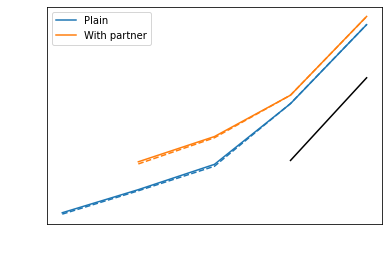

In [12]:
plt.loglog(2*2**np.array(ls),costsPureEnsemble, label="Plain", c="C0")
plt.loglog(2*2**np.array(ls),costsPure, c="C0", ls="--")
plt.loglog(2*2**np.array(ls)[1:],costsPartneredEnsemble[1:], label="With partner", c="C1")
plt.loglog(2*2**np.array(ls)[1:],costsPartnered[1:], c="C1", ls="--")
plt.loglog(2*2**np.array(ls)[-2:], [8/8,8], c="black")
plt.xlabel("Grid cells")
plt.ylabel("Costs in Practise")
plt.legend(labelcolor="black")
plt.xticks(2*2**np.array(ls))

In [22]:
np.savetxt(source_path+"/costsTable.txt" , np.vstack([2*2**np.array(ls),costsPureEnsemble, costsPartneredEnsemble]).T,
            delimiter=",", header="grid_cells, costs_pure, costs_partnered",
            fmt="%10.5f")